In [40]:
import pandas as pd
from matplotlib import pyplot as plt

In [1]:
data = pd.read_csv('~/Downloads/train_series_clean.csv')

events = pd.read_csv('~/Downloads/child-mind-institute-detect-sleep-states/train_events.csv')
events = events[~events['step'].isna()]
events = events.sort_values('timestamp')

# there are some duplicate events (looks like they are at same time in different time zone)
events = events.drop_duplicates(subset=['series_id', 'night', 'event'])

events = events.set_index('series_id')

In [11]:
data = data.set_index('series_id')

In [36]:
meta = pd.read_csv('~/Downloads/train.csv')
meta = meta.set_index('series_id')

In [37]:
meta['duration'] = meta['end'] - meta['start']
meta['duration'].describe()

count     9088.000000
mean      8387.272887
std       2741.011235
min        576.000000
25%       6247.500000
50%       7602.000000
75%      10738.000000
max      18226.000000
Name: duration, dtype: float64

In [45]:
meta.sort_values('duration', ascending=False)

,Unnamed: 0,start,end,night,label,duration
series_id,,,,,,
d93b0c7de16b,2406,137857,156083,11,awake,18226
2b8d87addea9,6390,374221,392303,23,awake,18082
137b99e936ab,5019,248257,266303,16,awake,18046
f7eb179216c2,2655,114229,131507,8,awake,17278
0402a003dae9,7144,96181,112991,7,awake,16810
...,...,...,...,...,...,...
de6fedfb6139,3813,147060,148356,9,sleep,1296
b750c8c1556c,2933,375744,376860,22,sleep,1116
e2a849d283c0,4352,0,935,1,awake,935


In [13]:
pd.to_datetime(data.loc['de6fedfb6139'].iloc[182160:182736]['timestamp']).max() - pd.to_datetime(data.loc['de6fedfb6139'].iloc[182160:182736]['timestamp']).min()

Timedelta('0 days 00:47:55')

In [34]:
events.loc['de6fedfb6139']

,night,event,step,timestamp
series_id,,,,
de6fedfb6139,1,onset,8892.0,2018-04-09T22:51:00-0400
de6fedfb6139,1,wakeup,14976.0,2018-04-10T07:18:00-0400
de6fedfb6139,2,onset,26160.0,2018-04-10T22:50:00-0400
de6fedfb6139,2,wakeup,32484.0,2018-04-11T07:37:00-0400
de6fedfb6139,3,onset,42696.0,2018-04-11T21:48:00-0400
...,...,...,...,...
de6fedfb6139,31,wakeup,531852.0,2018-05-10T05:11:00-0400
de6fedfb6139,32,onset,544764.0,2018-05-10T23:07:00-0400
de6fedfb6139,32,wakeup,550440.0,2018-05-11T07:00:00-0400


In [38]:
meta.loc['de6fedfb6139']

,Unnamed: 0,start,end,night,label,duration
series_id,,,,,,
de6fedfb6139,3796,0,8891,1,awake,8891
de6fedfb6139,3797,8892,14976,1,sleep,6084
de6fedfb6139,3798,14977,26159,2,awake,11182
de6fedfb6139,3799,26160,32484,2,sleep,6324
de6fedfb6139,3800,32485,42695,3,awake,10210
...,...,...,...,...,...,...
de6fedfb6139,3853,515161,528203,31,awake,13042
de6fedfb6139,3854,528204,531852,31,sleep,3648
de6fedfb6139,3855,531853,544763,32,awake,12910


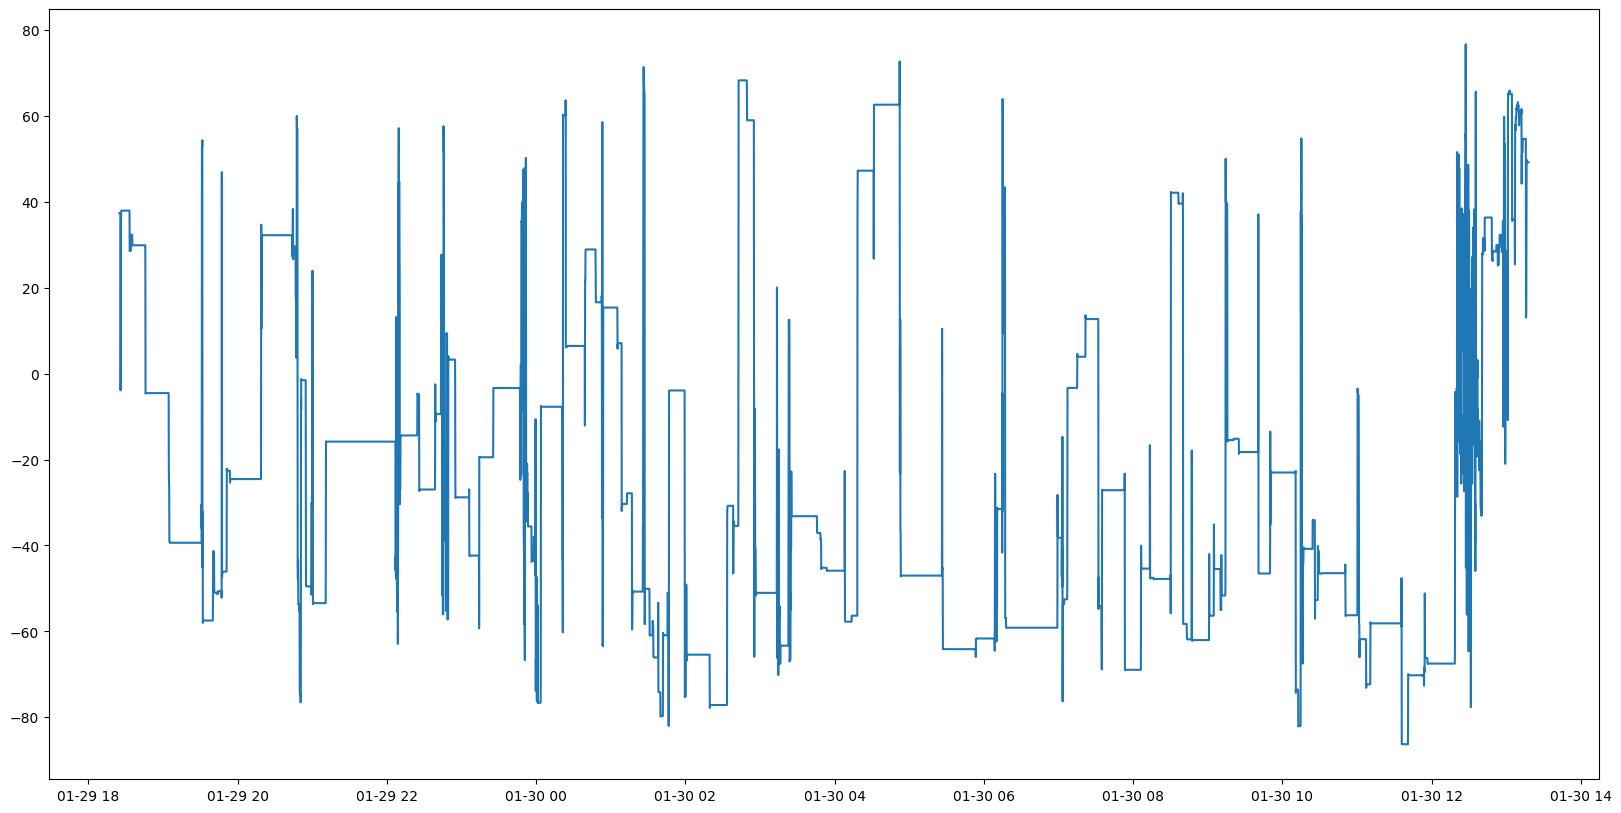

In [48]:
series = data.loc['148471991ffb'].iloc[332040:345636].copy()
series['timestamp'] = pd.to_datetime(series['timestamp'])
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(series['timestamp'], series['anglez'])

In [21]:
# Only including sleeps > 6 hours
60 * 60 * 6 / 5

4320.0

In [22]:
meta = meta[meta['duration'] > 4320]

In [23]:
meta['duration'].describe()

count     8682.000000
mean      8618.234163
std       2577.514127
min       4332.000000
25%       6396.000000
50%       7860.000000
75%      10798.000000
max      18226.000000
Name: duration, dtype: float64

In [24]:
meta.sort_values('duration', ascending=False)

,Unnamed: 0,series_id,start,end,night,label,duration
2406,2406,d93b0c7de16b,137857,156083,11,awake,18226
6390,6390,2b8d87addea9,374221,392303,23,awake,18082
5019,5019,137b99e936ab,248257,266303,16,awake,18046
2655,2655,f7eb179216c2,114229,131507,8,awake,17278
7144,7144,0402a003dae9,96181,112991,7,awake,16810
...,...,...,...,...,...,...,...
4613,4613,db75092f0530,26520,30864,2,sleep,4344
787,787,8e32047cbc1f,6096,10440,1,sleep,4344
7293,7293,0dee4fda51c3,178812,183144,11,sleep,4332
5377,5377,7822ee8fe3ec,215388,219720,13,sleep,4332


In [25]:
pd.to_datetime(data.loc['d93b0c7de16b'].iloc[137857:156083]['timestamp']).max() - pd.to_datetime(data.loc['d93b0c7de16b'].iloc[137857:156083]['timestamp']).min()

Timedelta('1 days 01:18:45')

In [26]:
# Only include awake periods < 18 hours
60 * 60 * 18 / 5

12960.0

In [27]:
meta = meta[meta['duration'] < 12960]

In [28]:
meta['duration'].describe()

count     8334.000000
mean      8391.880730
std       2366.443531
min       4332.000000
25%       6360.000000
50%       7632.000000
75%      10618.000000
max      12958.000000
Name: duration, dtype: float64

In [29]:
8391 * 5 / 60 / 60

11.654166666666667

In [30]:
meta

,Unnamed: 0,series_id,start,end,night,label,duration
0,0,fe90110788d2,0,6804,2,sleep,6804
1,1,fe90110788d2,6805,17015,3,awake,10210
3,3,fe90110788d2,21337,33011,4,awake,11674
4,4,fe90110788d2,33012,41712,4,sleep,8700
5,5,fe90110788d2,41713,51755,5,awake,10042
...,...,...,...,...,...,...,...
9083,9083,c535634d7dcd,93672,100428,6,sleep,6756
9084,9084,c535634d7dcd,100429,111599,7,awake,11170
9085,9085,c535634d7dcd,111600,117492,7,sleep,5892
9086,9086,c535634d7dcd,117493,127955,8,awake,10462
